# импорт библиотек и чтение файла #

In [ ]:
!pip -q install pandas
!pip -q install rdkit
!pip -q install seaborn
!pip -q install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
# novie importi rdkit.Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski, EState
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# from sklearn.tree import DecisionTreeRegressor

# работа с файлом (заполняем наны, смотрим дескрайб)

In [ ]:
data = pd.read_csv('/content/SolubilityDataset.csv')
data

SMILES  Solubility   MolLogP  \
0                   [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  10.00000   
1                                  O=C1Nc2cccc3cccc1c23   -3.254767   2.40550   
2                                       Clc1ccc(C=O)cc1   -2.177078   2.15250   
3     [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409   8.11610   
4     C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065   2.48540   
...                                                 ...         ...       ...   
9977                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000   2.61700   
9978  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000  -0.21440   
9979                                c1(cc(ccc1C(C)C)C)O   -2.190000   2.82402   
9980  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000   5.09308   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000   3.60960   

         MolMR  HeavyAtomCount  NumRotatableBonds  NumValenceElectrons  \
0     102.4454            23.0               17.0                142.0   
1      51.9012            13.0                0.0                 62.0   
2      36.8395             9.0                1.0                 46.0   
3     200.7106            53.0               10.0                264.0   
4     119.0760            31.0               12.0                164.0   
...        ...             ...                ...                  ...   
9977   78.6762            19.0                8.0                106.0   
9978  109.5409            32.0                2.0                170.0   
9979   46.9328            11.0                1.0                 60.0   
9980  131.6560            33.0               13.0                180.0   
9981   87.7318            23.0                4.0                116.0   

      NumAromaticRings    TPSA   LabuteASA      BertzCT  
0                  0.0    0.00  158.520601   210.377334  
1                  2.0   29.10   75.183563   511.229248  
2                  1.0   17.07   58.261134  6085.486839  
3                  6.0  120.72  323.755434  1964.648666  
4                  2.0   56.60  183.183268   769.899934  
...                ...     ...         ...          ...  
9977               1.0   41.57  115.300645   374.236893  
9978               1.0  181.62  182.429237  1148.584975  
9979               1.0   20.23   67.685405   251.049732  
9980               2.0   63.95  198.569223   938.203977  
9981               3.0   67.51  132.552025   909.550973  

[9982 rows x 11 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMILES               9982 non-null   object 
 1   Solubility           9897 non-null   float64
 2   MolLogP              9924 non-null   float64
 3   MolMR                9915 non-null   float64
 4   HeavyAtomCount       9959 non-null   float64
 5   NumRotatableBonds    9974 non-null   float64
 6   NumValenceElectrons  9917 non-null   float64
 7   NumAromaticRings     9936 non-null   float64
 8   TPSA                 9939 non-null   float64
 9   LabuteASA            9917 non-null   float64
 10  BertzCT              9945 non-null   float64
dtypes: float64(10), object(1)
memory usage: 858.0+ KB


In [ ]:
data.isna().sum()

SMILES                  0
Solubility             85
MolLogP                58
MolMR                  67
HeavyAtomCount         23
NumRotatableBonds       8
NumValenceElectrons    65
NumAromaticRings       46
TPSA                   43
LabuteASA              65
BertzCT                37
dtype: int64

In [ ]:
len(data)

9982

так как NaNов не так много по сравнению с количеством строк в нашем датасете, то заполним наны средними значениями столбцов

In [ ]:
data.columns

Index(['SMILES', 'Solubility', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'TPSA',
       'LabuteASA', 'BertzCT'],
      dtype='object')

In [ ]:
numeric_cols = list(set(data.columns) - set(['SMILES']))
numeric_cols

['NumValenceElectrons',
 'TPSA',
 'Solubility',
 'LabuteASA',
 'NumRotatableBonds',
 'BertzCT',
 'MolLogP',
 'HeavyAtomCount',
 'MolMR',
 'NumAromaticRings']

In [ ]:
# заполним наны средними значениями по столбцам

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [ ]:
data.describe()

Solubility      MolLogP        MolMR  HeavyAtomCount  \
count  9982.000000  9982.000000  9982.000000     9982.000000   
mean     -2.933150     2.105768    78.788567       20.680394   
std       2.452693     6.386341   121.074421       31.958473   
min     -14.680503   -51.753311  -126.659494      -35.989931   
25%      -4.360456     0.597400    40.775000       11.000000   
50%      -2.647872     1.966500    59.415400       15.000000   
75%      -1.220025     3.450125    83.018000       21.000000   
max       3.479977    78.808019  1560.034154      422.682696   

       NumRotatableBonds  NumValenceElectrons  NumAromaticRings         TPSA  \
count        9982.000000          9982.000000       9982.000000  9982.000000   
mean            5.243207           110.108684          1.349831    72.007412   
std            12.044812           160.654258          2.896499   111.300133   
min           -13.993534          -159.580874         -3.180648  -119.736167   
25%             1.000000            58.000000          0.000000    26.300000   
50%             3.000000            82.000000          1.000000    52.040000   
75%             5.000000           114.000000          2.000000    81.190000   
max           155.074741          2206.490971         38.241124  1330.873755   

         LabuteASA       BertzCT  
count  9982.000000   9982.000000  
mean    127.660684    633.041246  
std     189.307341   1655.330604  
min    -176.508845  -2017.692420  
25%      67.052694    165.657843  
50%      94.177918    358.622695  
75%     130.923580    623.120257  
max    2441.107013  22752.171111

In [ ]:
# максимальные значения большинства столбцов имеют гигантский гэп по сравнению со средним значением,
# при этом стандартное отклонение не покрывает этот разрыв.
# следовательно необходима чистка выбросов

# распределение и выбросы #

In [ ]:
colors = sns.color_palette('pastel', 5)

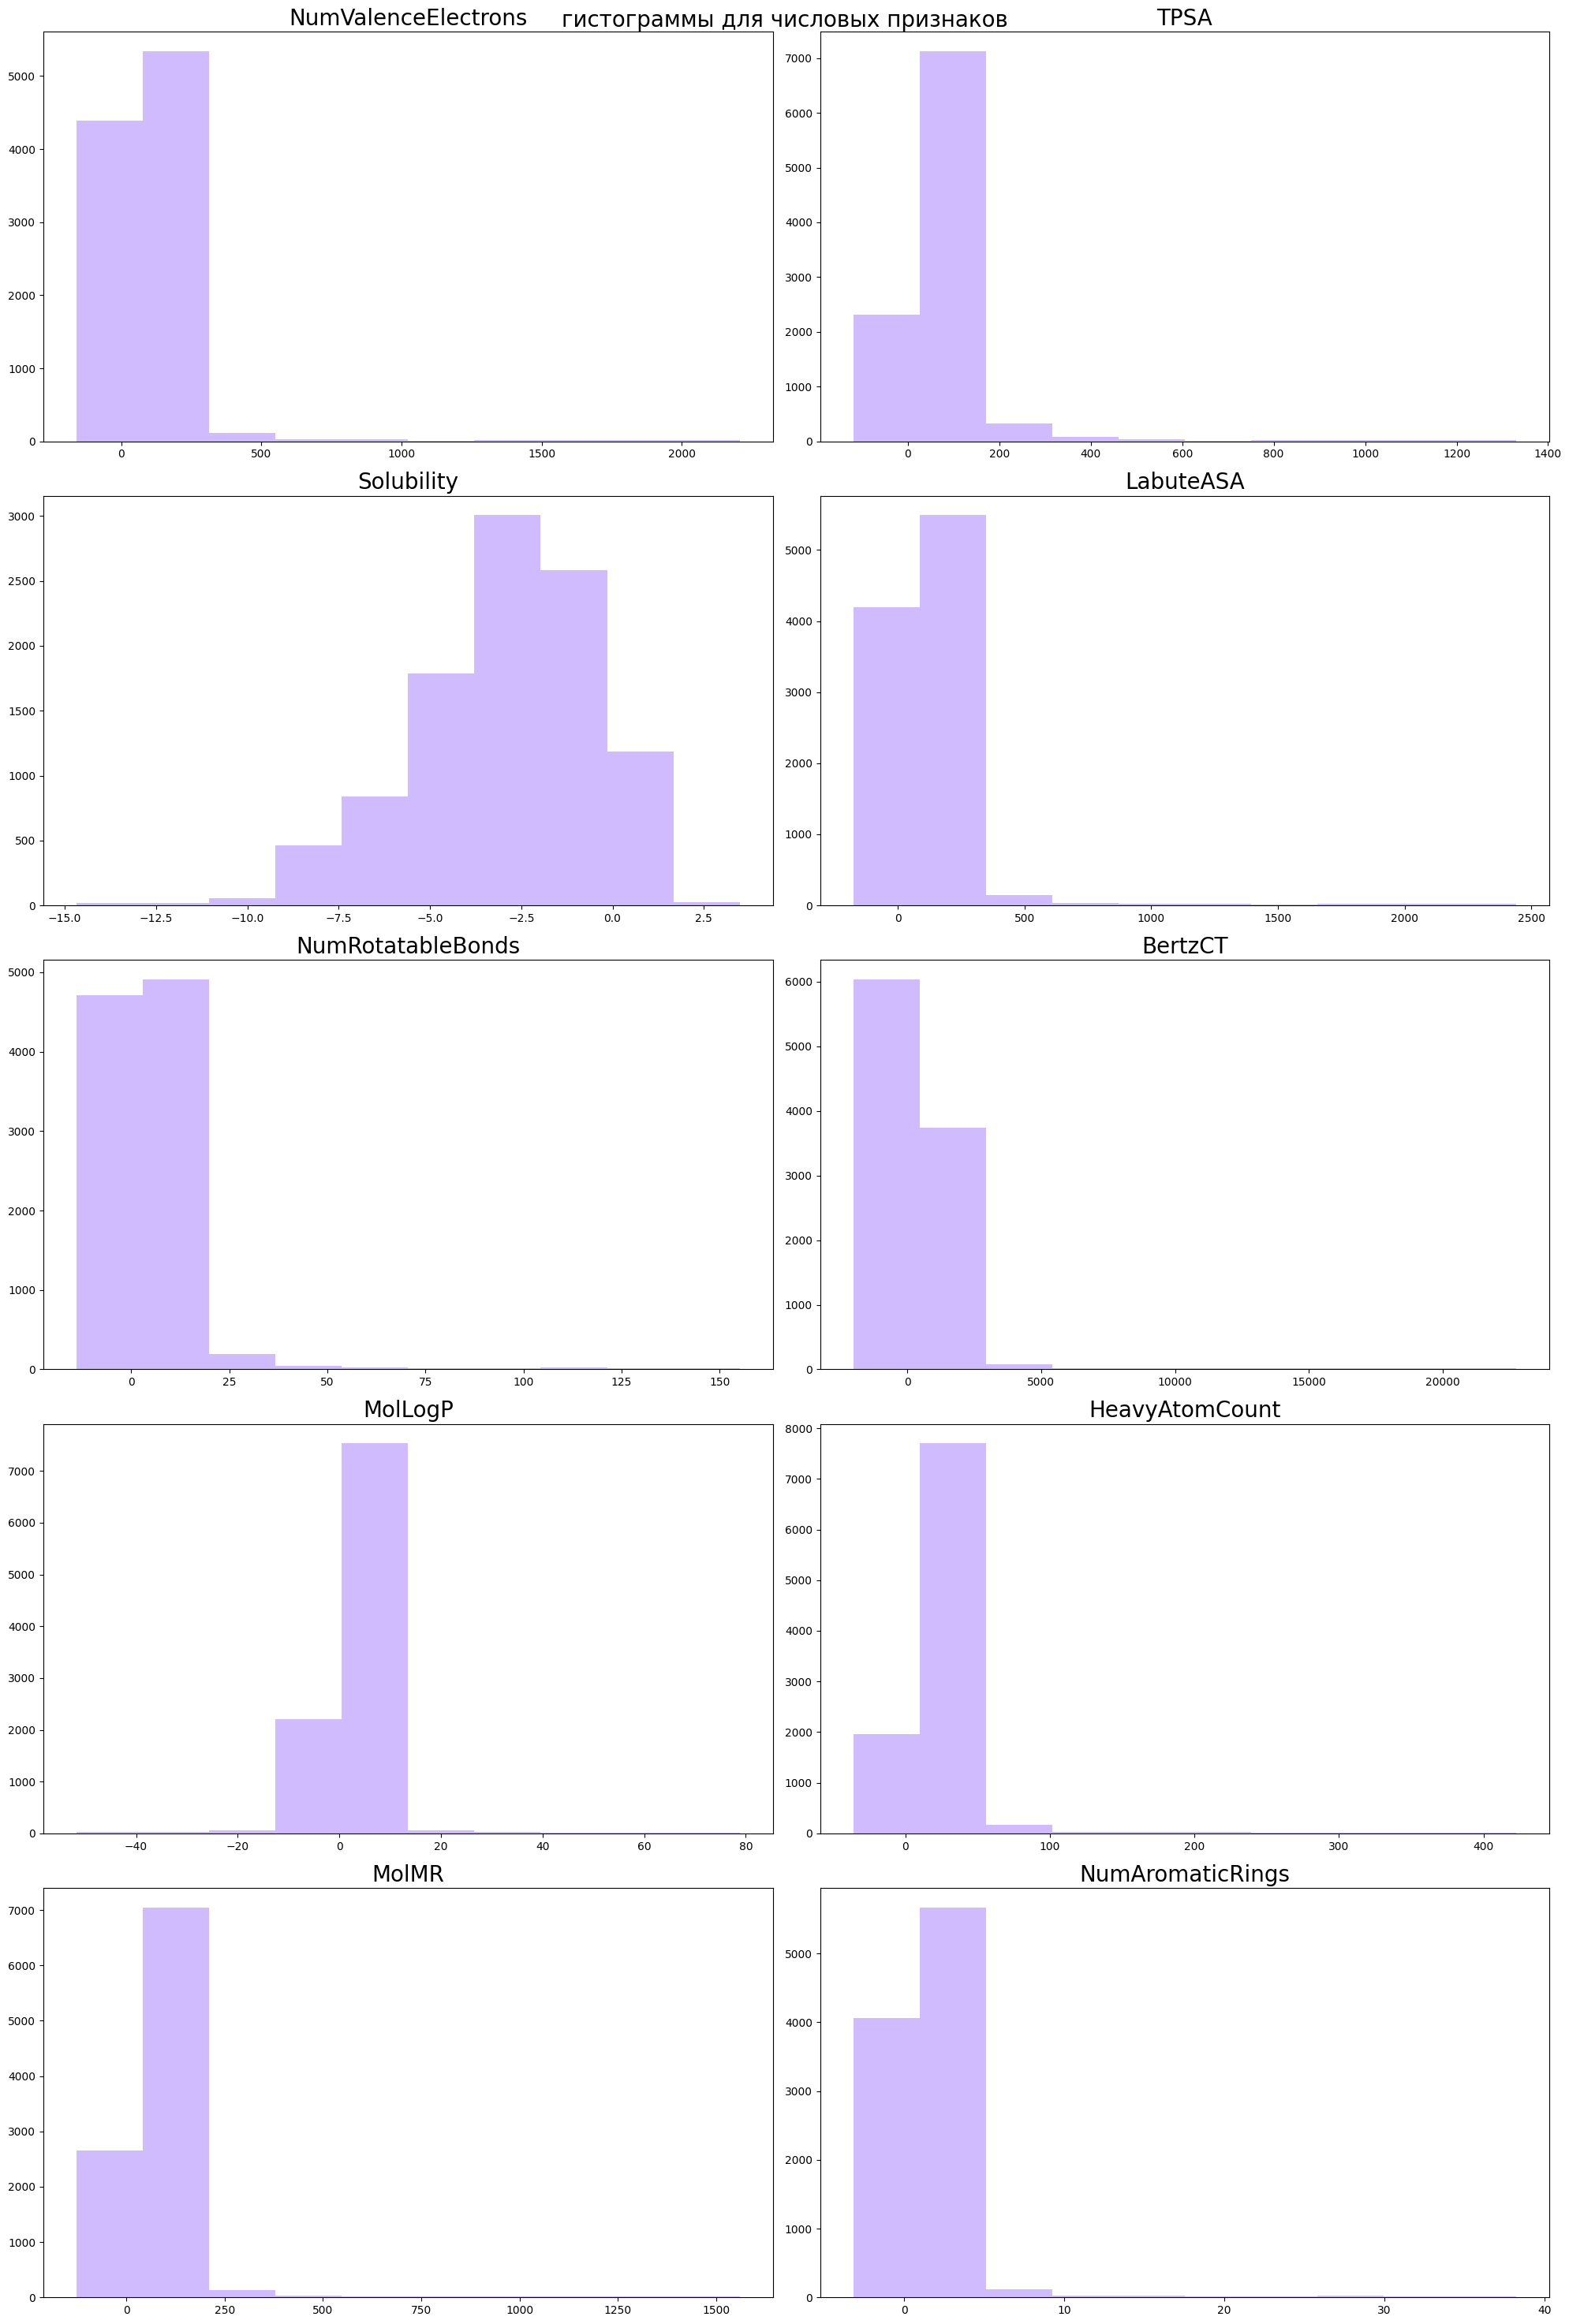

In [ ]:
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(20, 30))
fig.suptitle('гистограммы для числовых признаков', fontsize=20)
ax = ax.flatten()

for i, col in enumerate(numeric_cols):
  ax[i].hist(data[col], color = colors[4])
  ax[i].set_title(col, fontsize = 20)


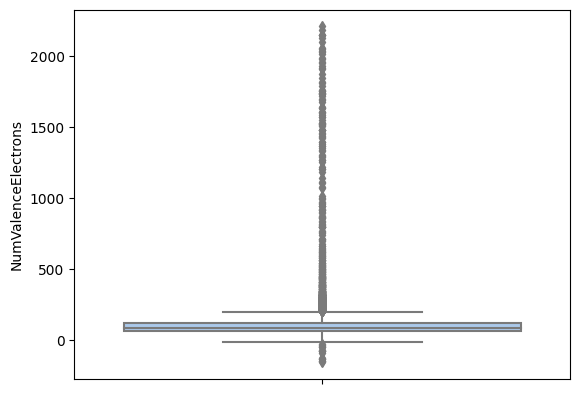

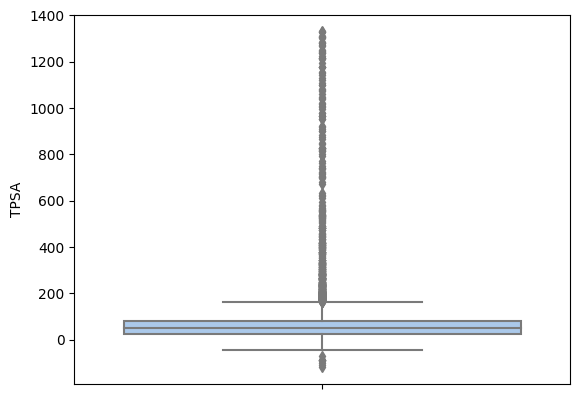

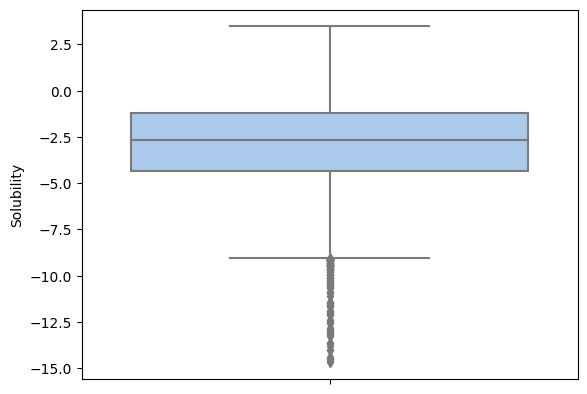

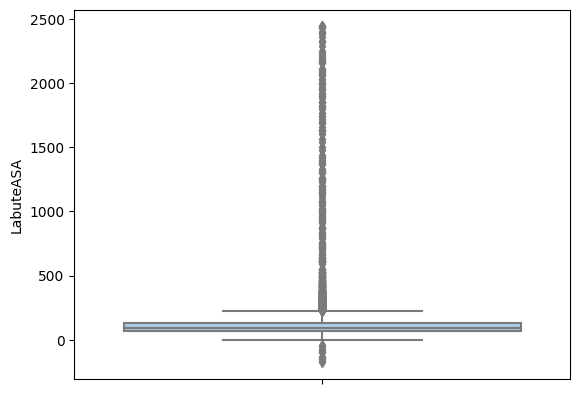

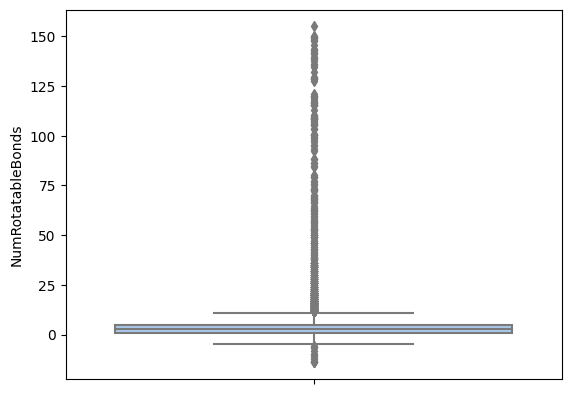

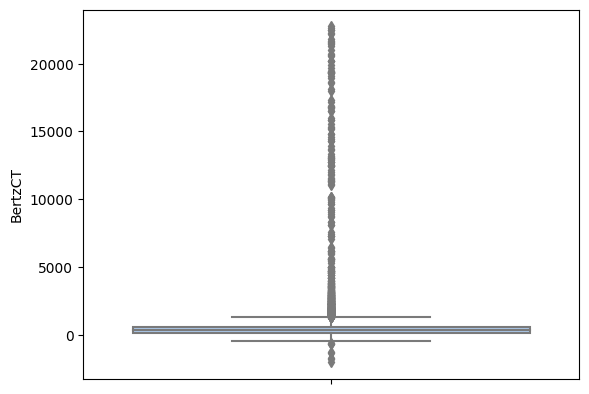

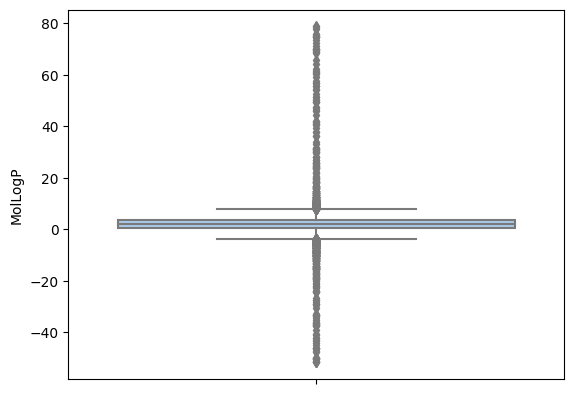

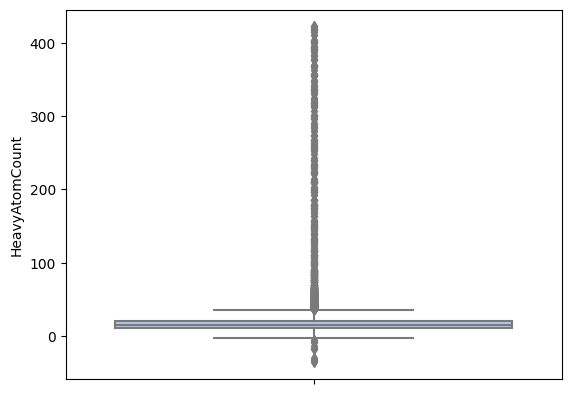

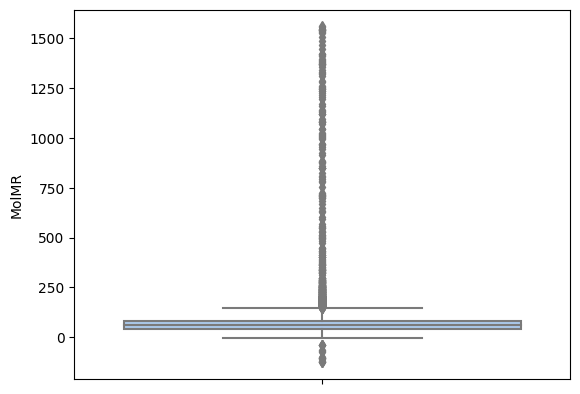

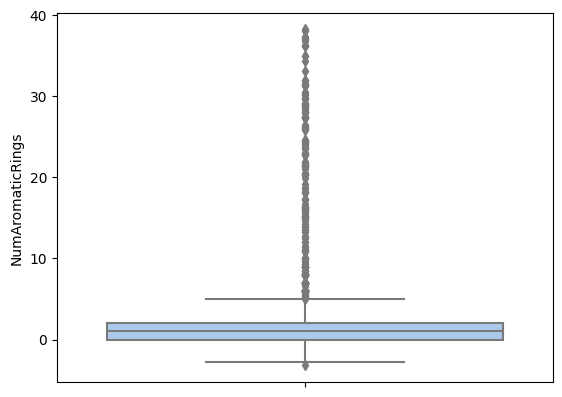

In [ ]:
for col in numeric_cols:
  plt.figure()
  sns.boxplot(y =col, data = data, color=colors[0])

In [ ]:
# выбросы блин
# quartile method

data_clean = data.copy()

for col in numeric_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  mult = 1.5
  data_clean = data_clean[~((data_clean[col] < (Q1-1.5*IQR)) | (data_clean[col] > (Q3+1.5*IQR)))]


In [ ]:
data_clean.describe()

Solubility      MolLogP        MolMR  HeavyAtomCount  \
count  7401.000000  7401.000000  7401.000000     7401.000000   
mean     -2.711408     1.962034    57.487202       14.794752   
std       2.154449     1.948273    24.888440        6.452635   
min      -9.024974    -3.652300    -5.604210       -3.109983   
25%      -4.031200     0.748780    39.440000       10.000000   
50%      -2.549400     1.918200    55.356700       14.000000   
75%      -1.240000     3.148220    74.777600       19.000000   
max       3.479977     7.725600   144.382600       36.000000   

       NumRotatableBonds  NumValenceElectrons  NumAromaticRings         TPSA  \
count        7401.000000          7401.000000       7401.000000  7401.000000   
mean            2.926264            80.289456          0.955073    51.378642   
std             2.554331            33.381599          0.964026    35.380147   
min            -4.680921             0.000000         -2.811197   -43.157254   
25%             1.000000            56.000000          0.000000    25.780000   
50%             2.000000            78.000000          1.000000    46.530000   
75%             4.000000           102.000000          2.000000    74.600000   
max            11.000000           198.000000          5.000000   163.110000   

         LabuteASA      BertzCT  
count  7401.000000  7401.000000  
mean     91.507915   378.737676  
std      37.529035   275.653305  
min      -4.854372  -433.688626  
25%      63.795557   151.918888  
50%      87.081594   330.985470  
75%     117.145063   565.234095  
max     221.521532  1296.948251

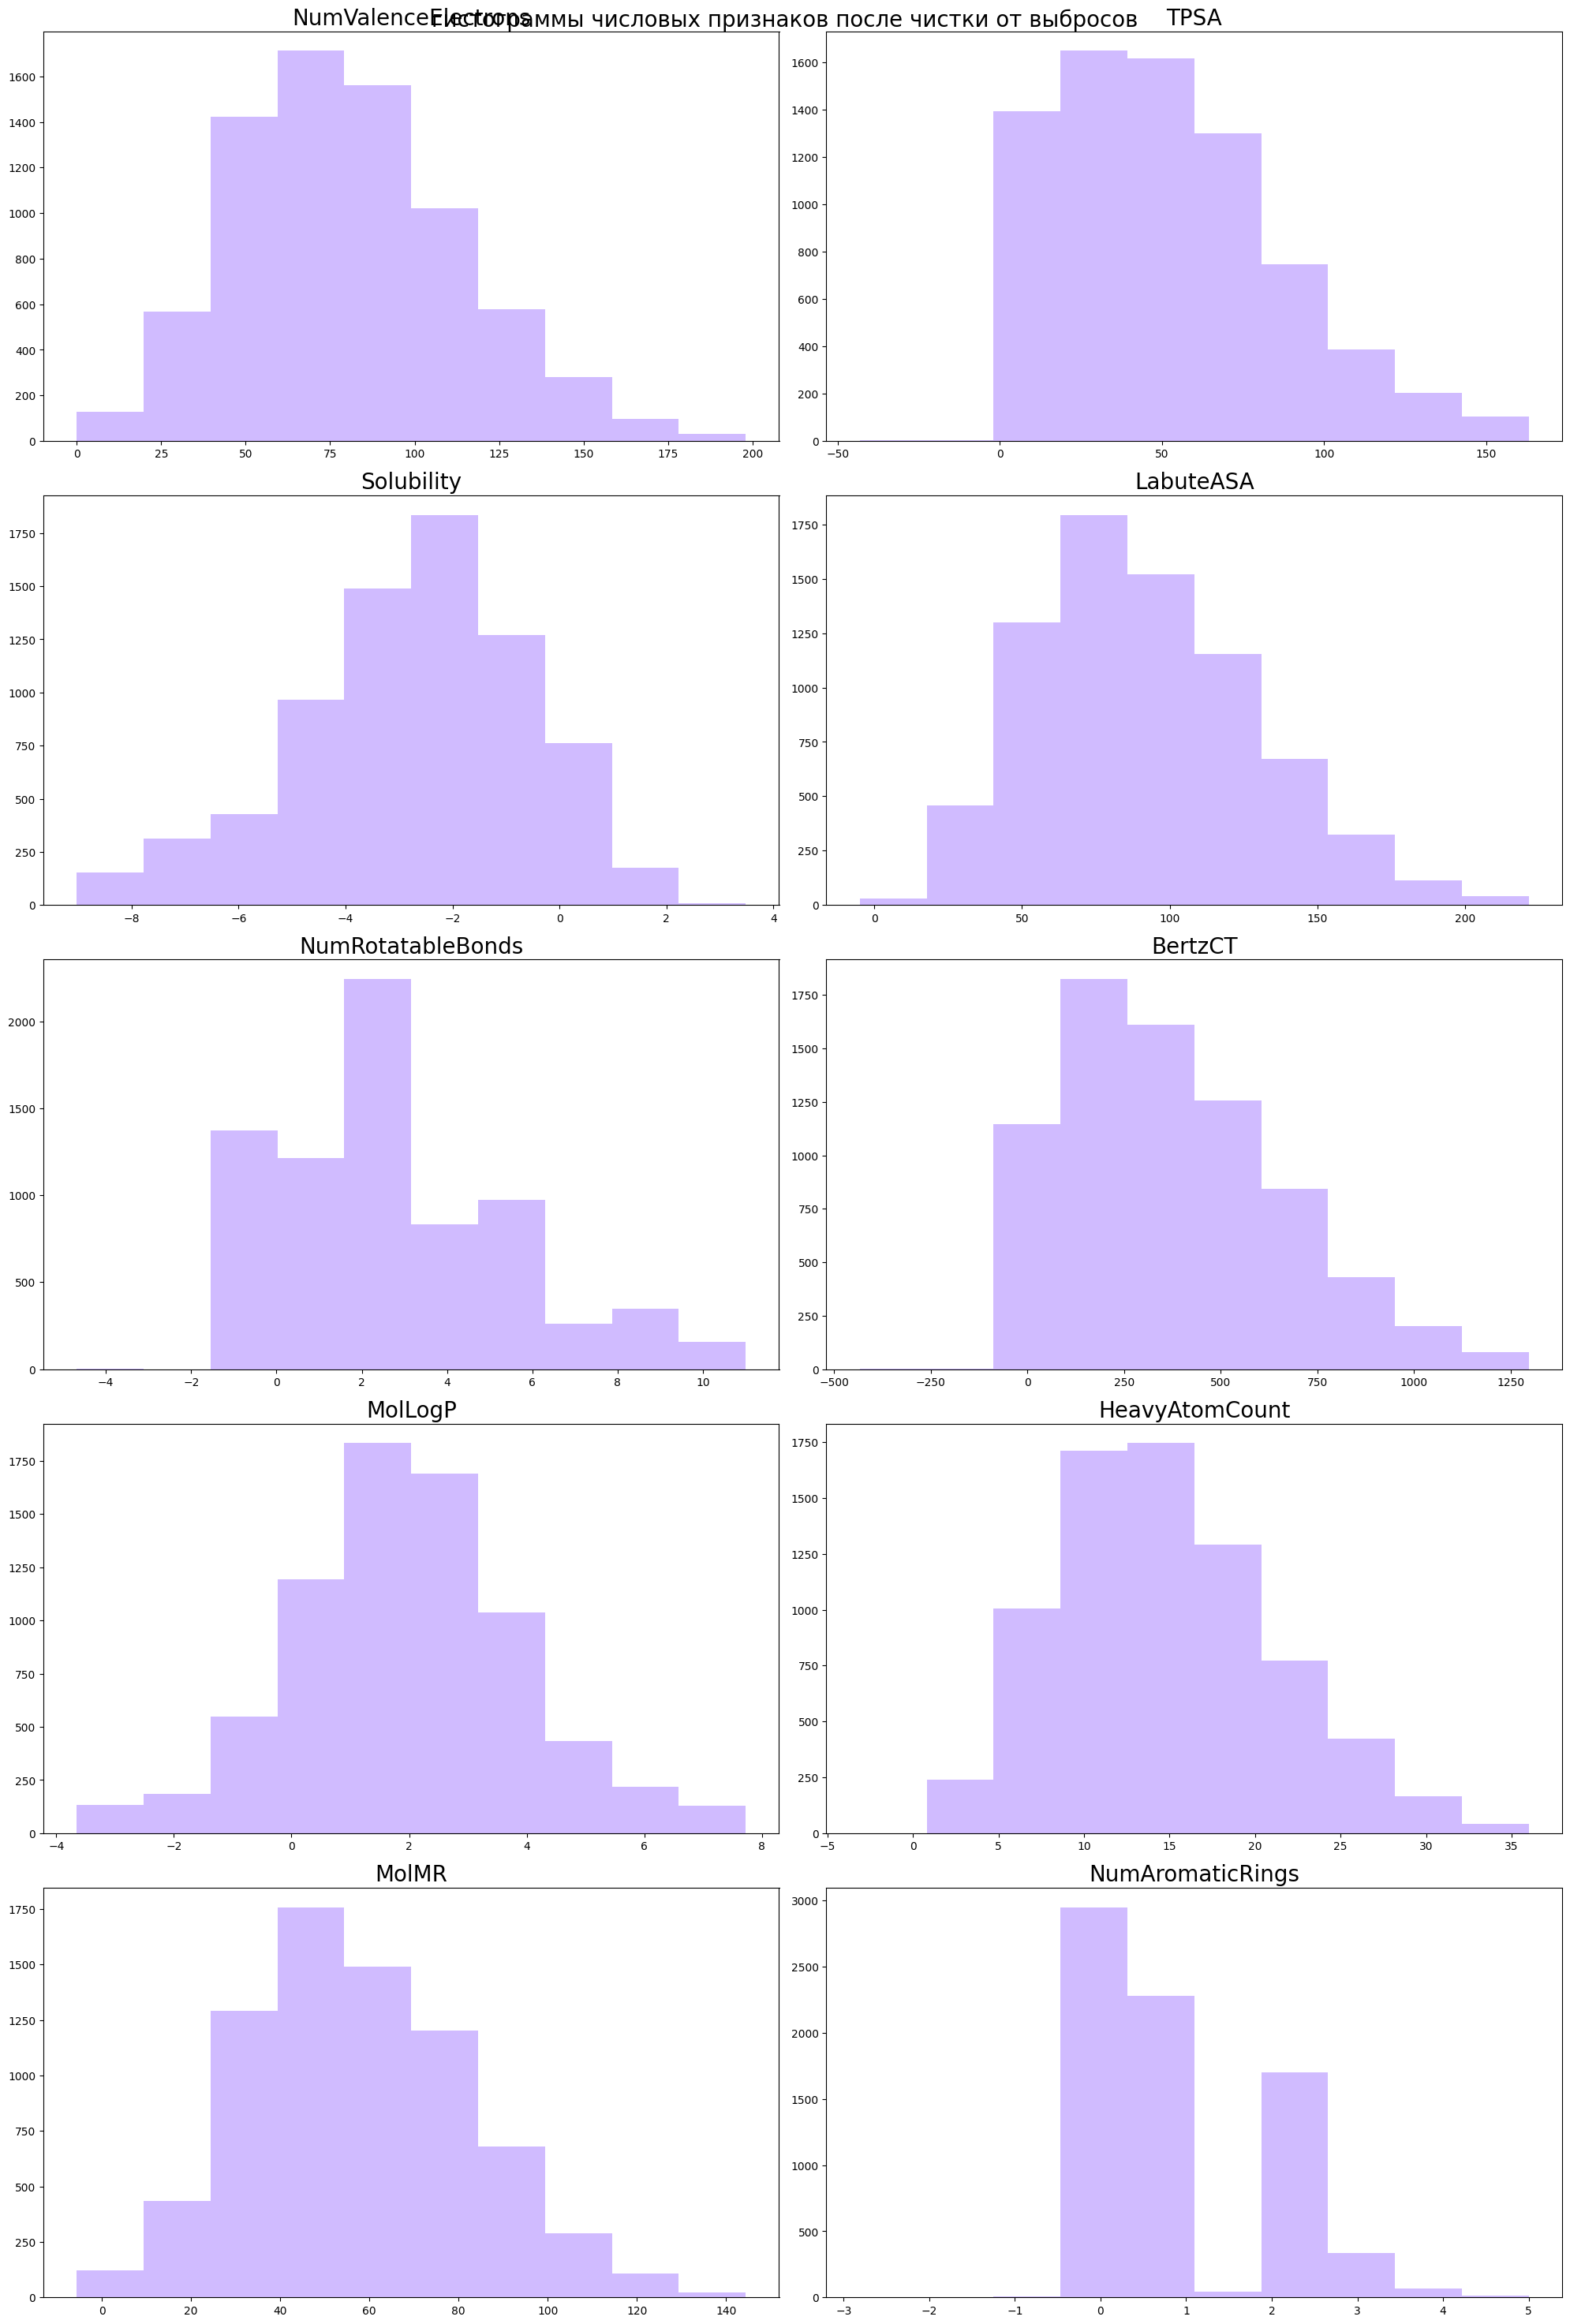

In [ ]:
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(20, 30))
fig.suptitle('гистограммы числовых признаков после чистки от выбросов', fontsize=20)
ax = ax.flatten()

for i, col in enumerate(numeric_cols):
  ax[i].hist(data_clean[col], color = colors[4])
  ax[i].set_title(col, fontsize = 20)

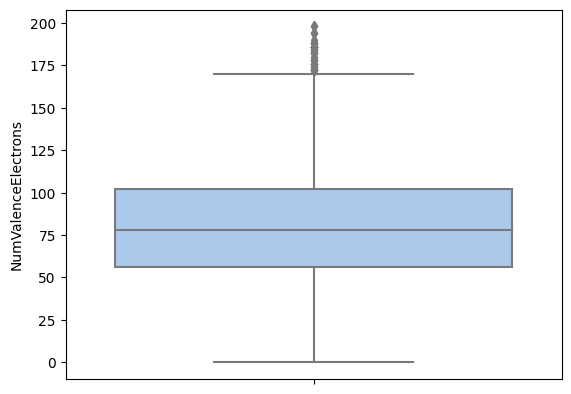

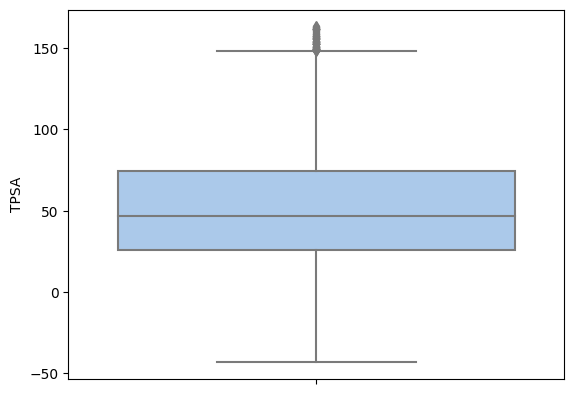

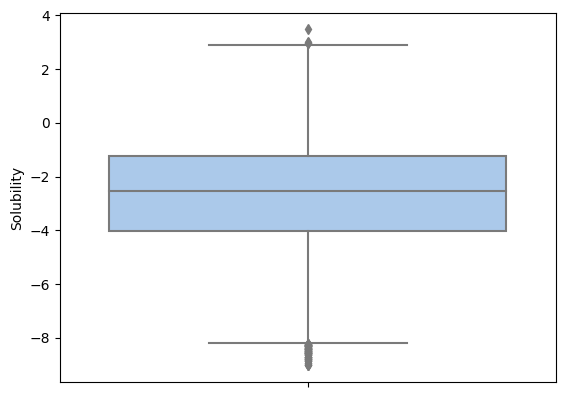

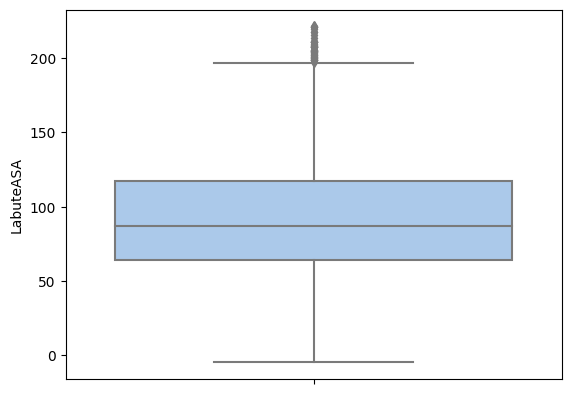

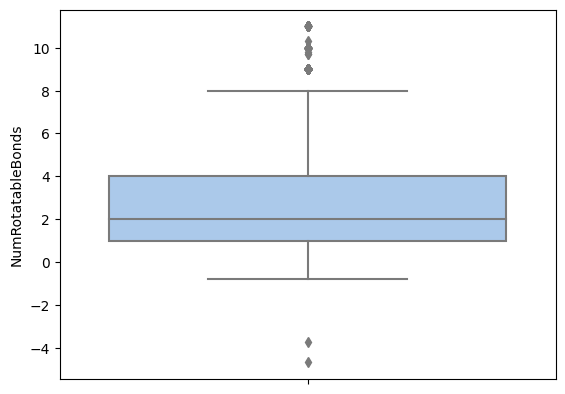

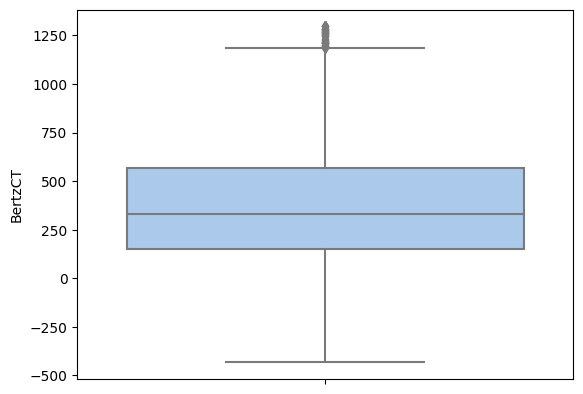

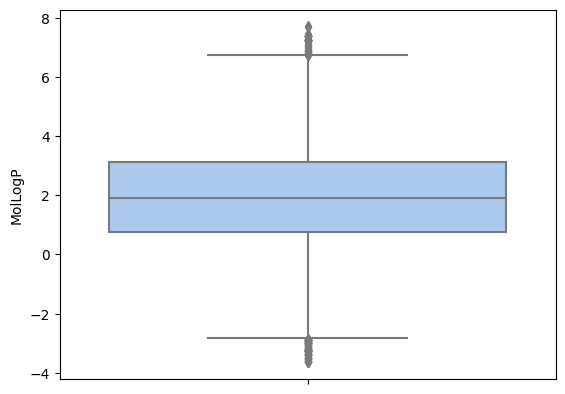

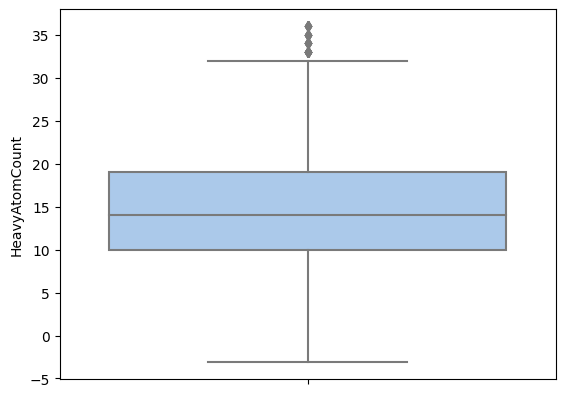

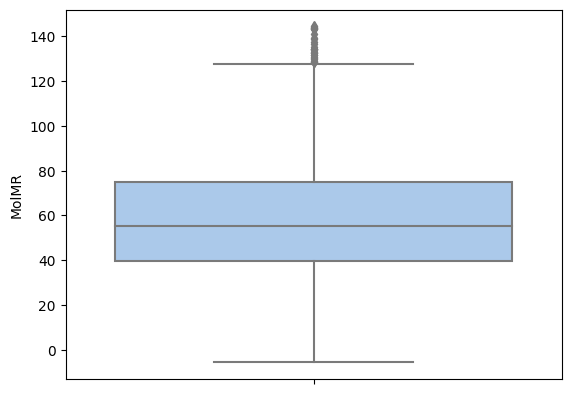

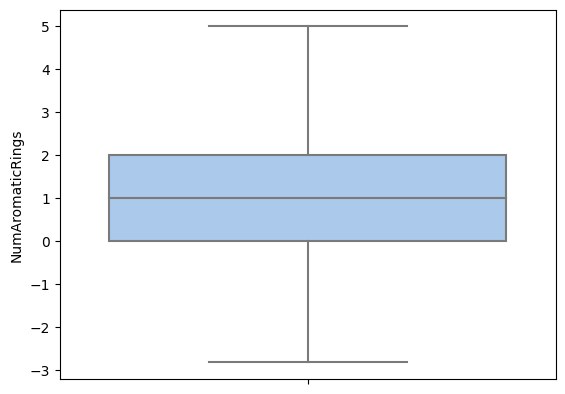

In [ ]:
for col in numeric_cols:
  plt.figure()
  sns.boxplot(y = col, data = data_clean, color=colors[0])



---



In [ ]:
# изменение размера графика

sns.set(rc={'figure.figsize':(15,12)})

<ipython-input-29-b9423064e0b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_clean.corr(), cmap="YlGnBu", annot=True)


<Axes: >

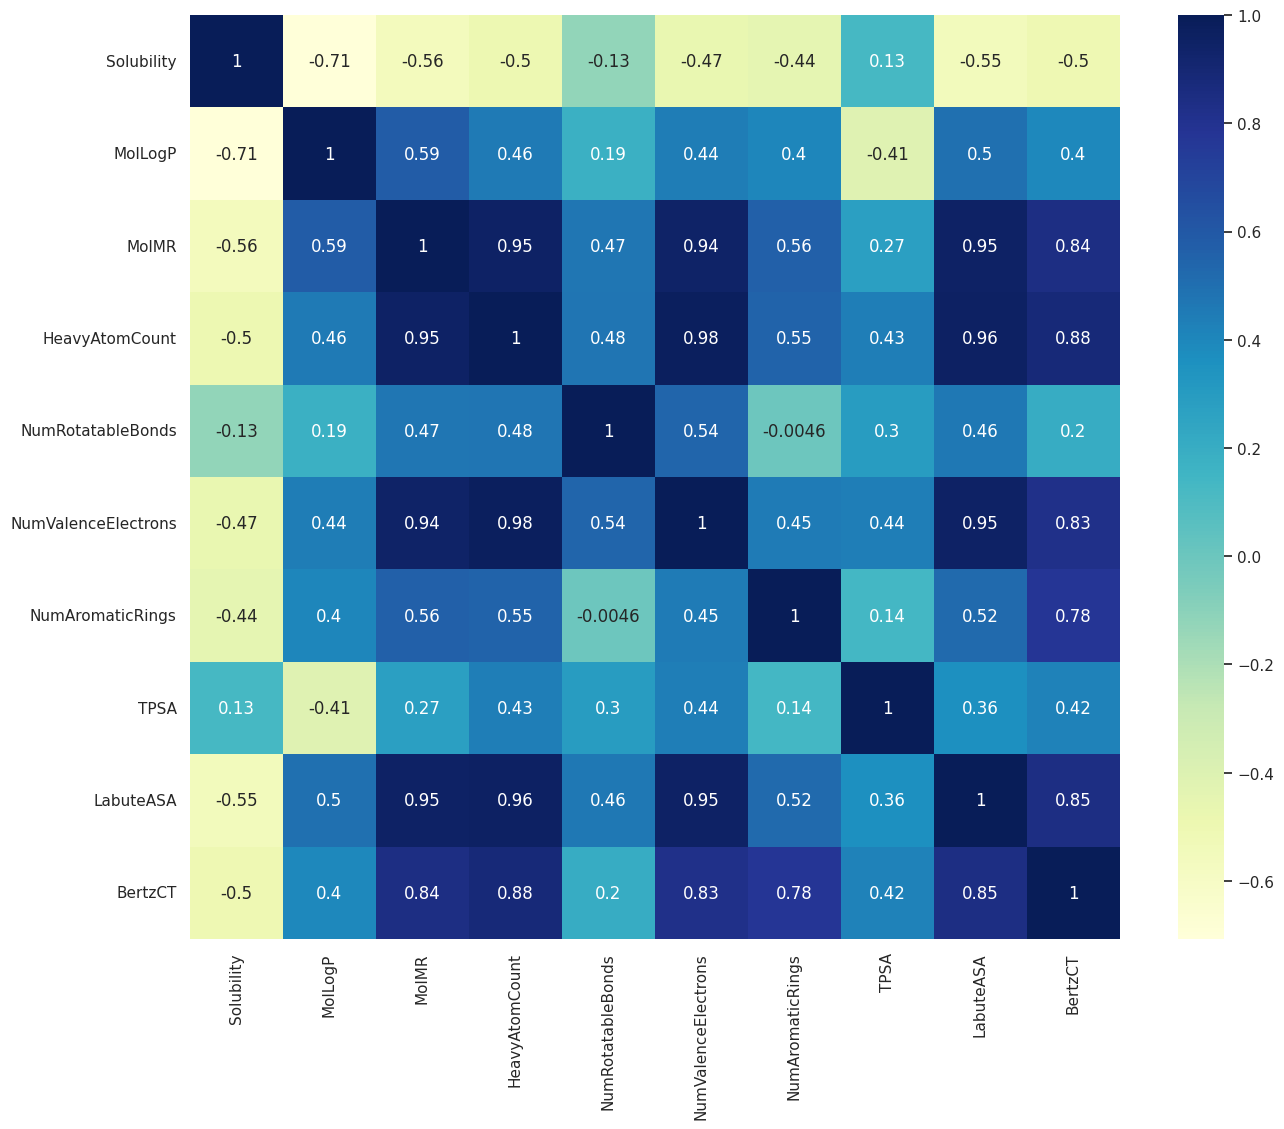

In [ ]:
# матрица корреляции между дескрипторами

sns.heatmap(data_clean.corr(), cmap="YlGnBu", annot=True)

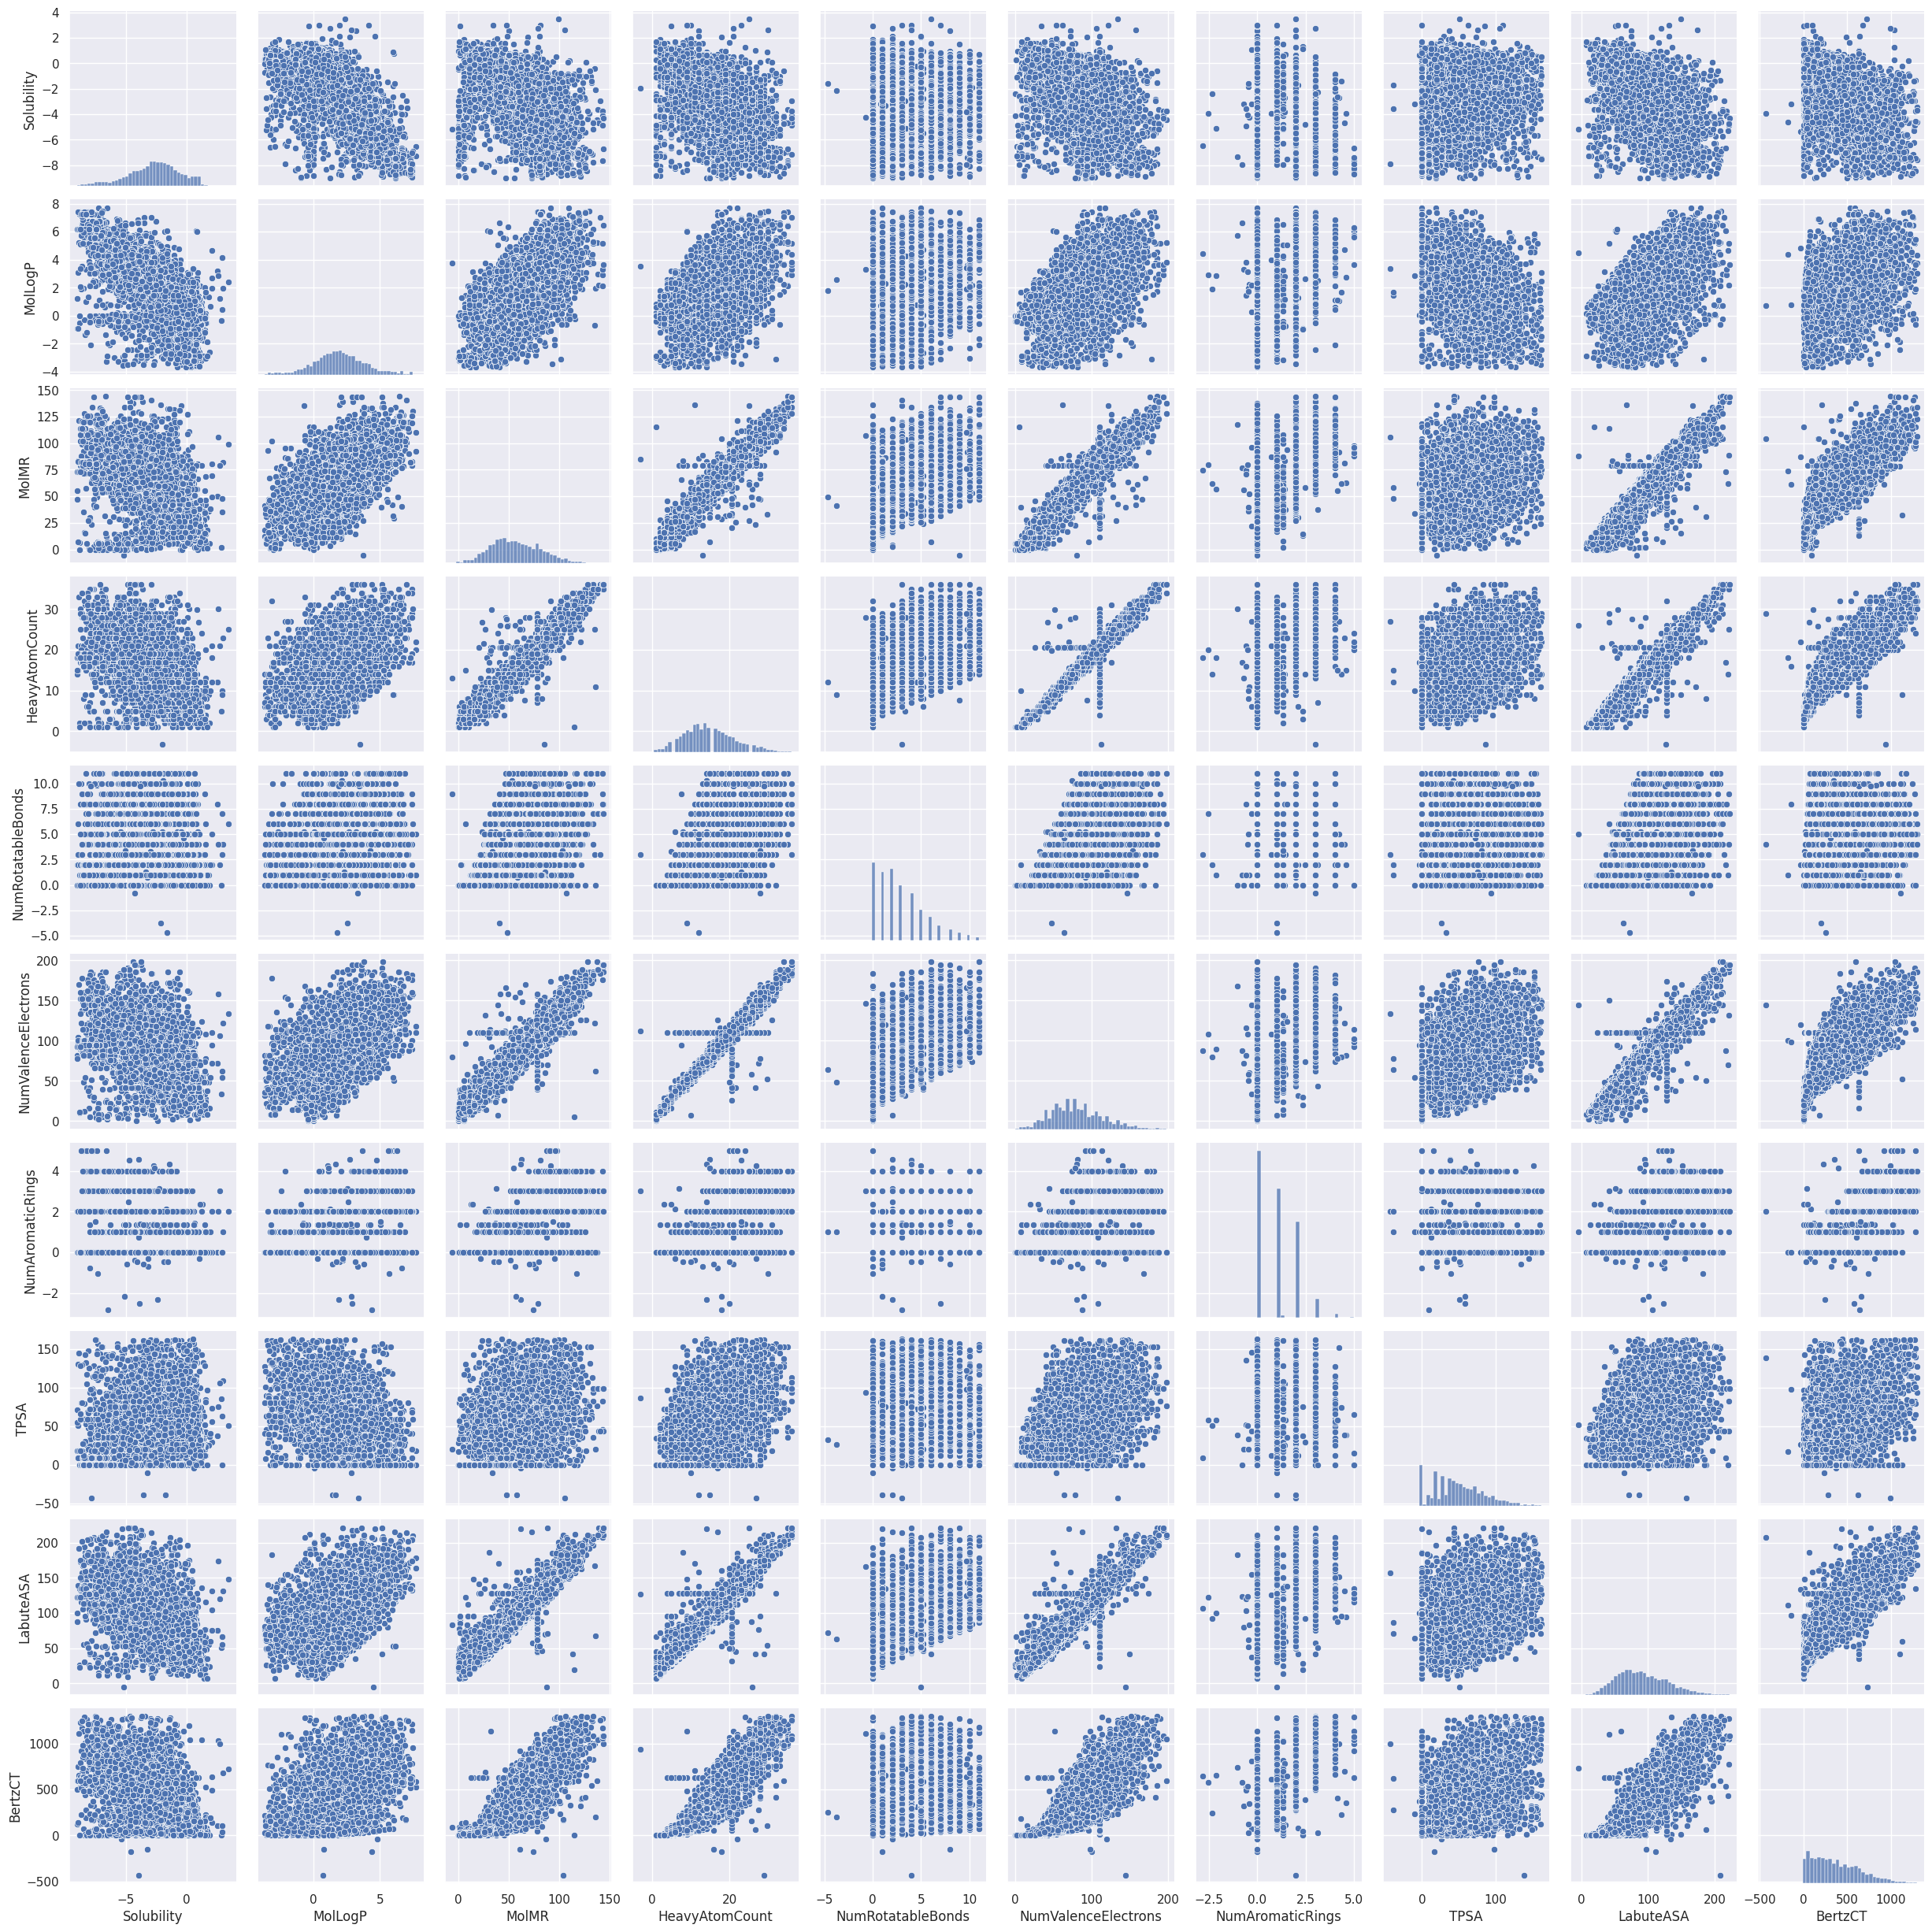

In [ ]:
sns.pairplot(data_clean.drop(columns = ["SMILES"], axis = 1))

In [ ]:
data_clean.columns

Index(['SMILES', 'Solubility', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'TPSA',
       'LabuteASA', 'BertzCT'],
      dtype='object')

In [ ]:
# убираем те, что слишком друг с другом коррелируют, чтобы избежать переобучения

data_corr = data_clean.drop(['HeavyAtomCount', 'BertzCT', 'NumValenceElectrons'], axis=1)
numeric_cols = list(set(numeric_cols) - set(['HeavyAtomCount', 'BertzCT', 'NumValenceElectrons']))


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

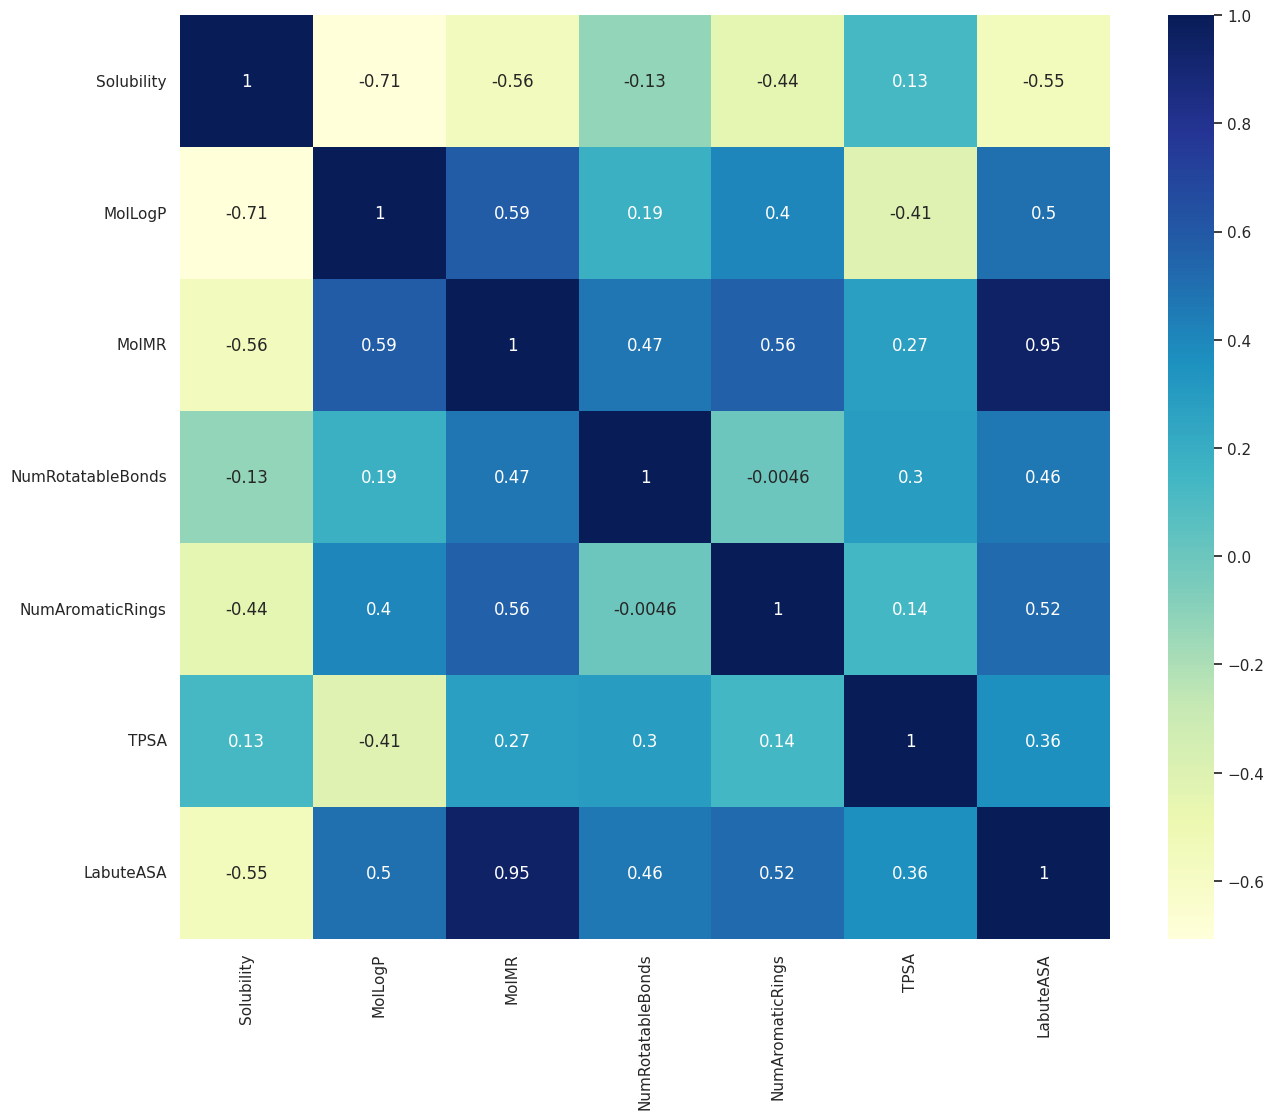

In [ ]:
sns.heatmap(data_corr.corr(), cmap="YlGnBu", annot=True)

# нормализация

In [ ]:
len(data_corr[numeric_cols].columns)

7

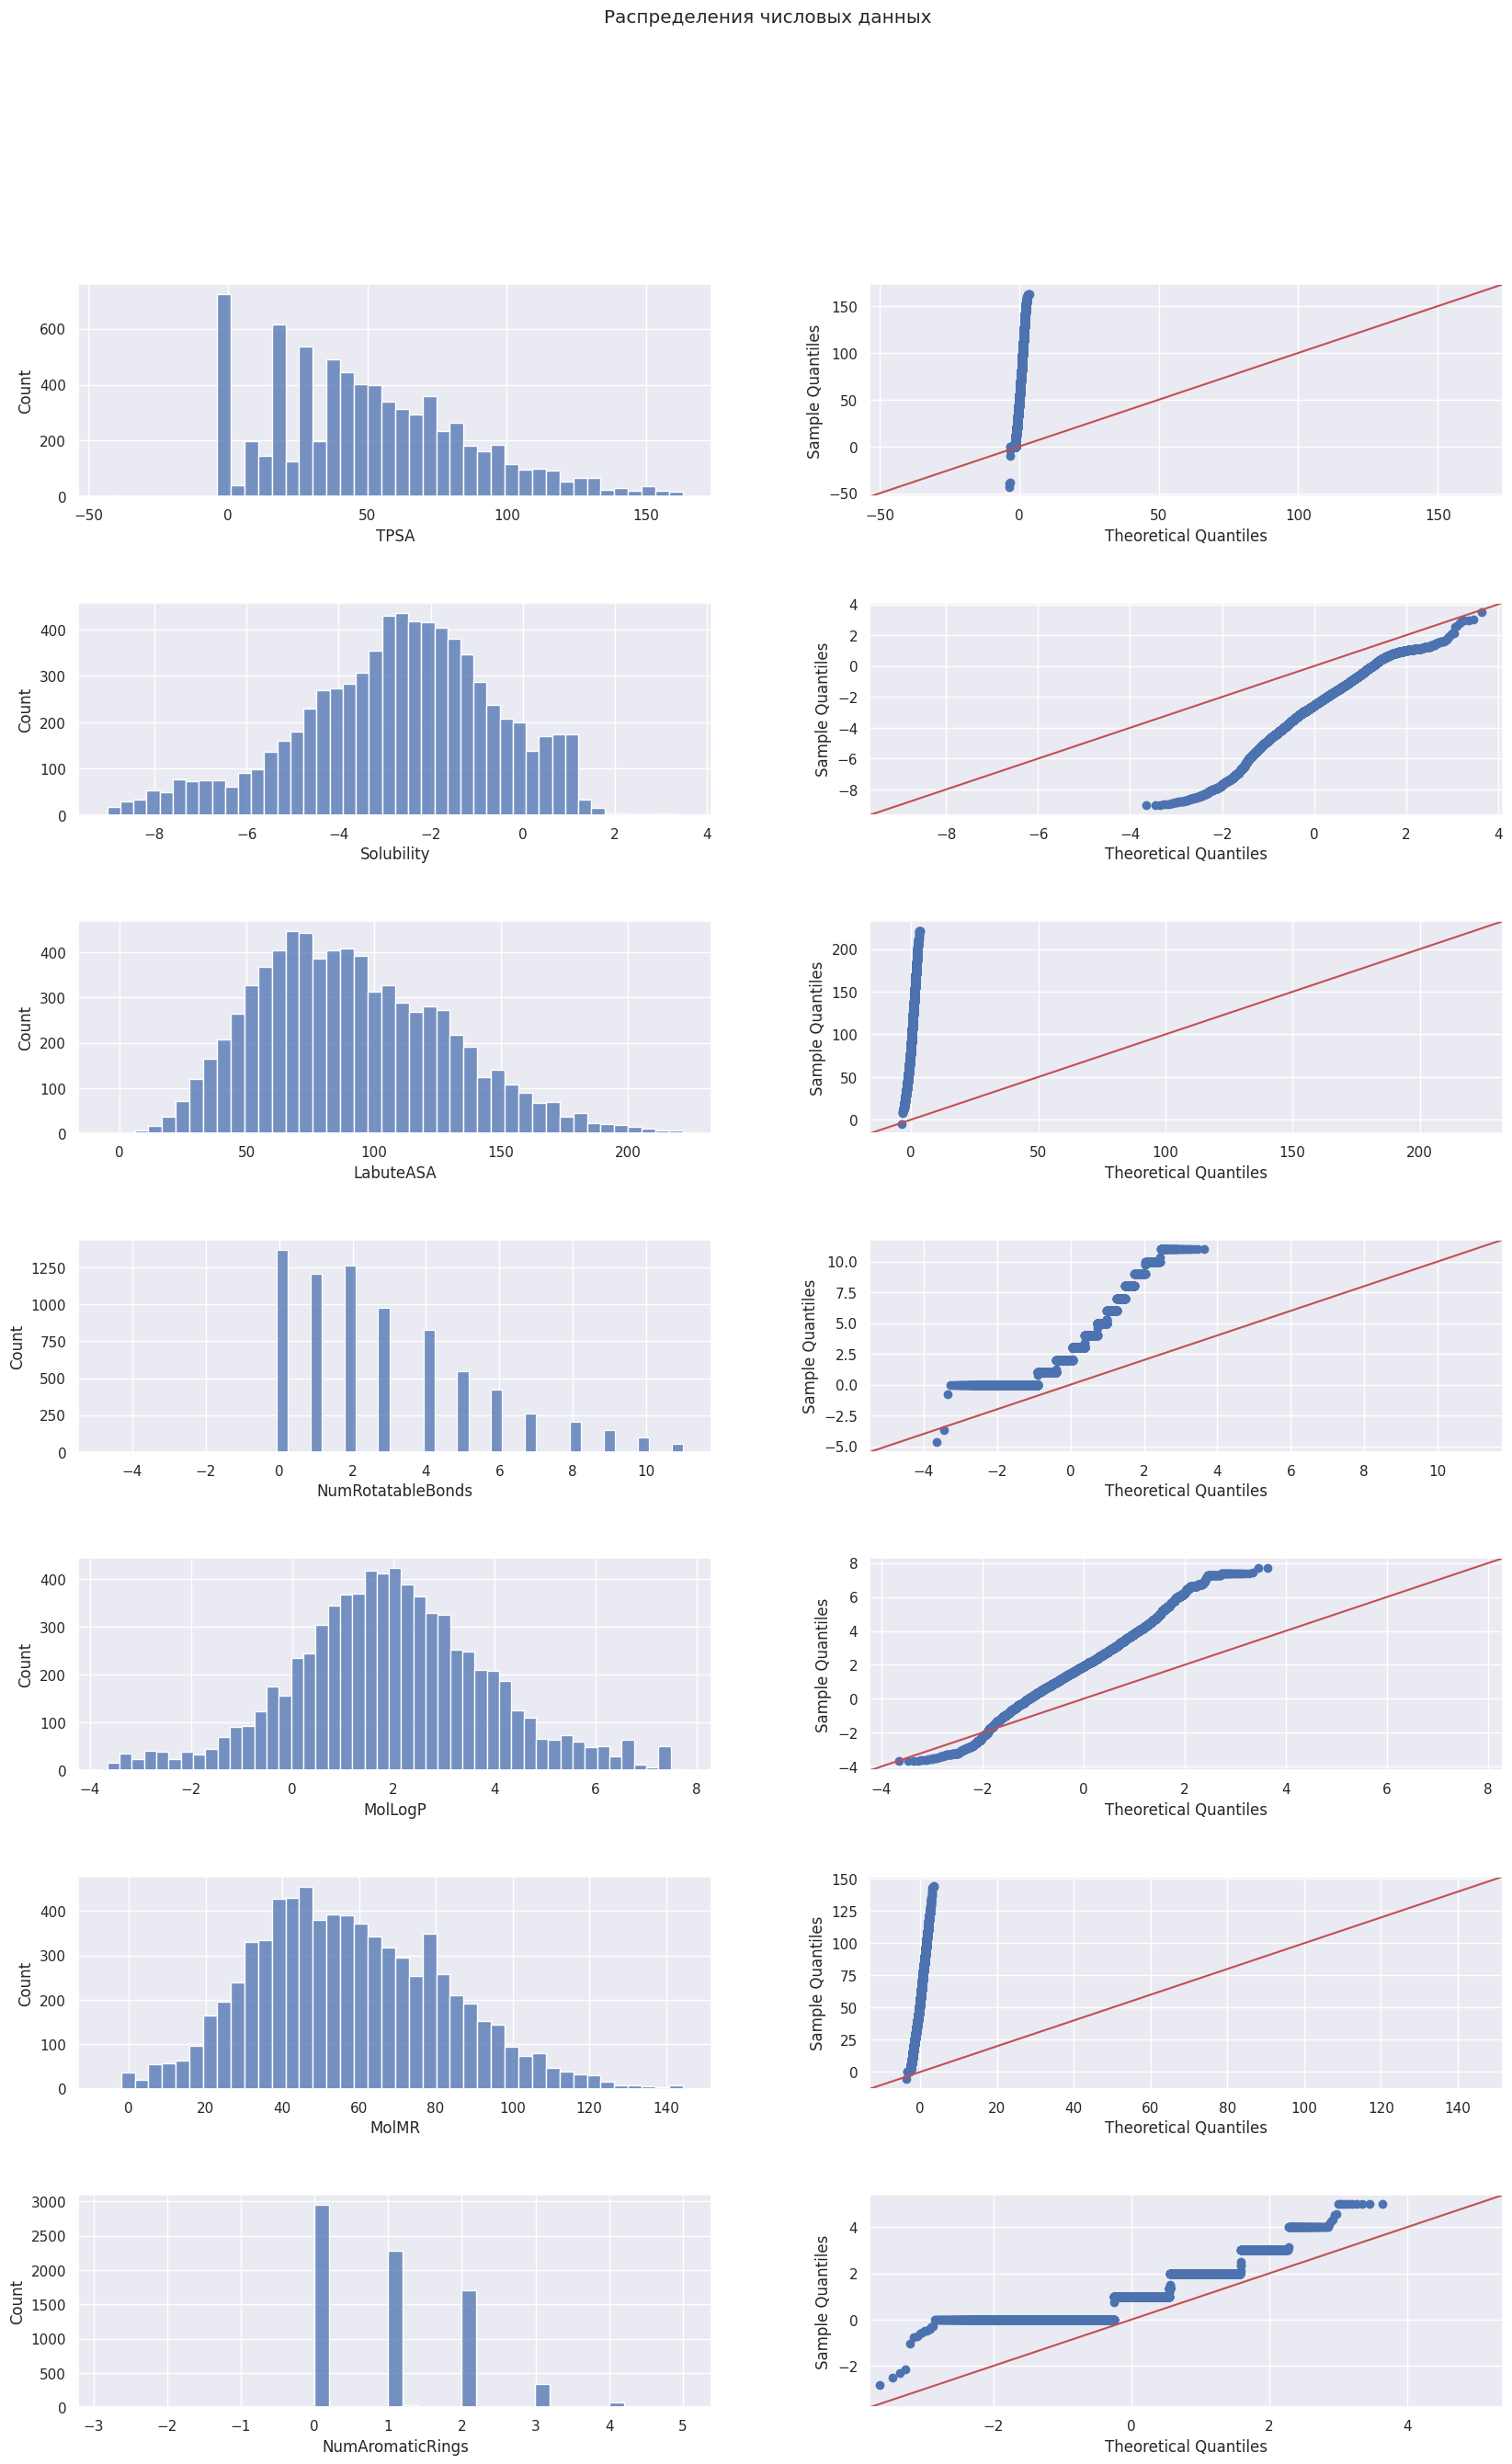

In [ ]:
import statsmodels.api as sm
import seaborn as sns

fig, axes = plt.subplots(len(data_corr[numeric_cols].columns), 2, figsize=(20, 30))
plt.subplots_adjust(wspace=0.25, hspace=0.5)

fig.suptitle('Распределения числовых данных')

for i, col in enumerate(numeric_cols):
  sns.histplot(ax=axes[i, 0], data=data_corr[col])
  sm.qqplot(ax=axes[i, 1], data=data_corr[col], line='45')


по графикам q-q заметим что числовых признаков распределенных по нормальному закону нет


In [ ]:
# стандартизация и нормализация

# идеал для нормального StandardScaler, для остальных MinMaxScaler,
# тут сделаем для всех MinMaxScaler, тк нормального нет

from sklearn import preprocessing

x = data_corr[numeric_cols].values
cols = data_corr[numeric_cols]
# cols
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data_corr[numeric_cols] = x_scaled
data_corr

SMILES  Solubility   MolLogP  \
1                                  O=C1Nc2cccc3cccc1c23    0.461434  0.532418   
5                                        Cc1cccc(C=C)c1    0.471959  0.552854   
6                                   CCC1CCC(CCC(O)=O)C1    0.458927  0.556324   
7     CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...    0.508633  0.367440   
8                           Fc1ccc(cc1)C(=O)c2ccc(F)cc2    0.370119  0.601877   
...                                                 ...         ...       ...   
9974              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1    0.503399  0.450763   
9976    CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O    0.361855  0.704682   
9977                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C    0.481007  0.551007   
9979                                c1(cc(ccc1C(C)C)C)O    0.546581  0.569202   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O    0.339463  0.638246   

         MolMR  NumRotatableBonds  NumAromaticRings      TPSA  LabuteASA  
1     0.383403           0.298511          0.615936  0.350309   0.353562  
5     0.312522           0.362282          0.487915  0.209230   0.268098  
6     0.357338           0.553598          0.359893  0.390063   0.348217  
7     0.680343           0.426054          0.359893  0.767050   0.719997  
8     0.412281           0.426054          0.615936  0.291987   0.424959  
...        ...                ...               ...       ...        ...  
9974  0.525200           0.489826          0.615936  0.684196   0.513140  
9976  0.690037           0.553598          0.615936  0.472820   0.673097  
9977  0.561919           0.808685          0.487915  0.410764   0.530777  
9979  0.350278           0.362282          0.487915  0.307306   0.320439  
9981  0.622295           0.553598          0.743957  0.536524   0.606983  

[7401 rows x 8 columns]

# добавление дескрипторов #

Пример добавления дескрипторов

```
 data["MolWt"] = pd.Series(np.array([Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
```



In [ ]:
# NumHeteroatoms, Chi0n, MaxPartialCharge, MinPartialCharge, SlogP_VSA12, SMR_VSA5, SMR_VSA10, HallKierAlpha,
# VSA_EState9, NumAromaticRings, NumHAcceptors, NumHDonors, RingCount, and NHOHCount

In [ ]:
# слабая коррелляция с таргетной переменной

# data_corr["NumHBA"] = pd.Series(np.array([rdMolDescriptors.CalcNumHBA(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
# data_corr["MaxPartialCharge"] = pd.Series(np.array([Chem.Descriptors.MaxPartialCharge(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

In [ ]:
data_corr["NHOHCount"] = pd.Series(np.array([Lipinski.NHOHCount(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

# сильно коррел с numhdonors
# data_corr["NumHBD"] = pd.Series(np.array([rdMolDescriptors.CalcNumHBD(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

# data_corr["Chi0n"] = pd.Series(np.array([rdMolDescriptors.CalcChi0n(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

data_corr["NumHeteroatoms"] = pd.Series(np.array([rdMolDescriptors.CalcNumHeteroatoms(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
data_corr["HallKierAlpha"] = pd.Series(np.array([rdMolDescriptors.CalcHallKierAlpha(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

data_corr["EState_VSA9"] = pd.Series(np.array([EState.EState_VSA.EState_VSA9(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

In [ ]:
data_corr["MaxPartialCharge"] = pd.Series(np.array([Chem.Descriptors.MaxPartialCharge(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
data_corr["MinPartialCharge"] = pd.Series(np.array([Chem.Descriptors.MinPartialCharge(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

data_corr["SlogP_VSA12"] = pd.Series(np.array([Chem.MolSurf.SlogP_VSA12(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
data_corr["SMR_VSA10"] = pd.Series(np.array([Chem.MolSurf.SMR_VSA10(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

data_corr["NumHAcceptors"] = pd.Series(np.array([Lipinski.NumHAcceptors(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
data_corr["NumHDonors"] = pd.Series(np.array([Lipinski.NumHDonors(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
data_corr["RingCount"] = pd.Series(np.array([Lipinski.RingCount(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)


In [ ]:
# data_corr["MinAbsPartialCharge"] = pd.Series(np.array([Chem.Descriptors.MinAbsPartialCharge(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)
# data_corr["MaxAbsPartialCharge"] = pd.Series(np.array([Chem.Descriptors.MaxAbsPartialCharge(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

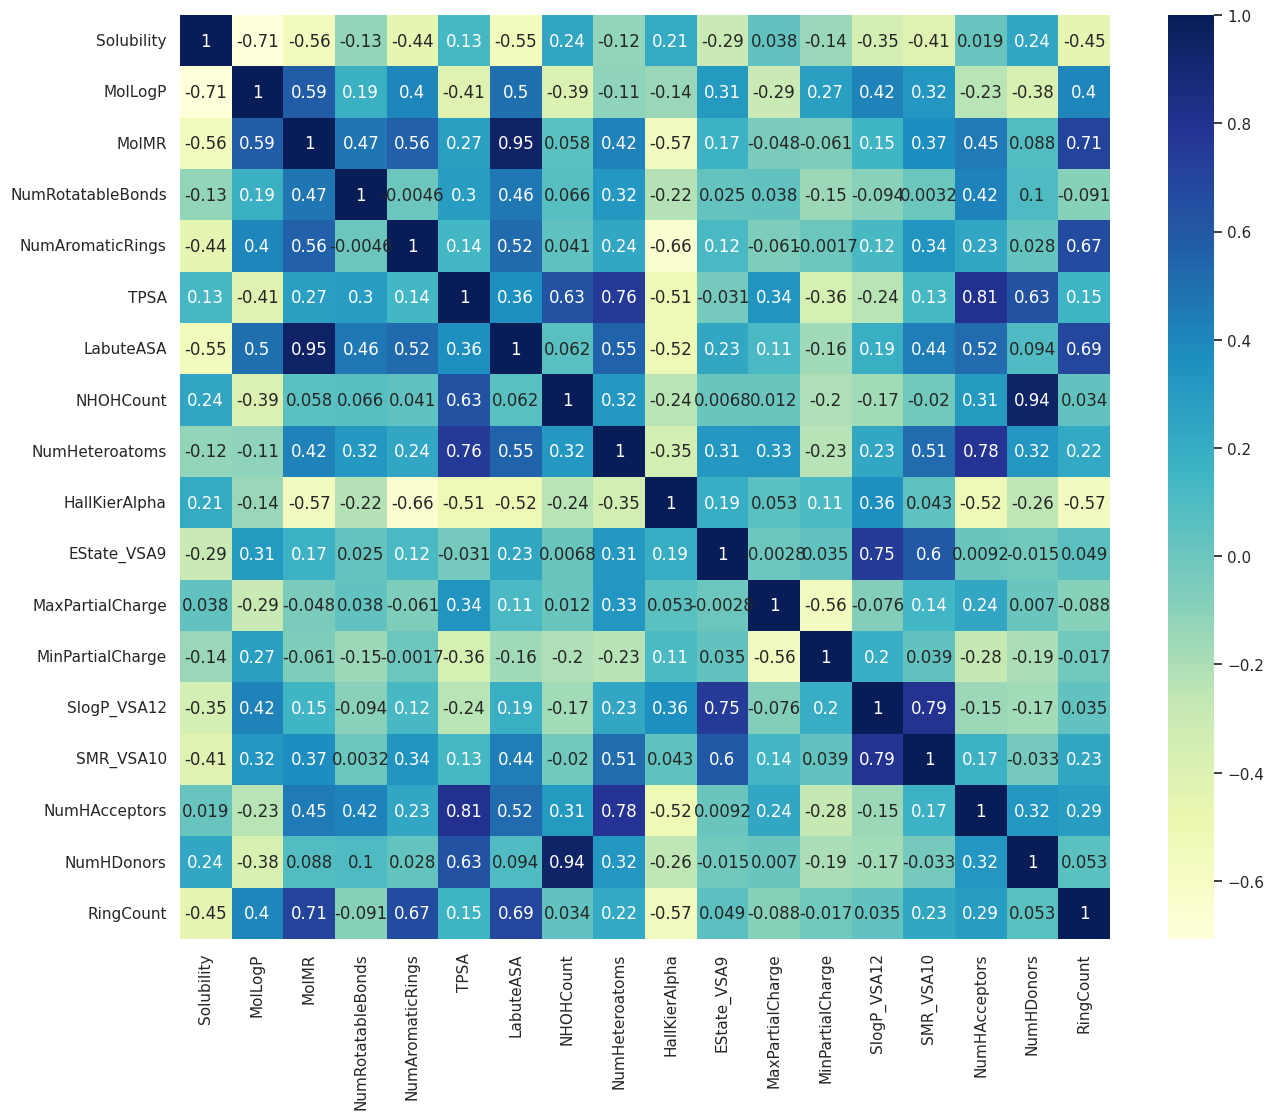

In [ ]:
sns.heatmap(data_corr.corr(), cmap="YlGnBu", annot=True)

In [ ]:
# data_corr = data_corr.drop(['MinAbsPartialCharge', 'MaxAbsPartialCharge'], axis=1)

In [ ]:
data_corr.isna().sum()

SMILES                0
Solubility            0
MolLogP               0
MolMR                 0
NumRotatableBonds     0
NumAromaticRings      0
TPSA                  0
LabuteASA             0
NHOHCount             0
NumHeteroatoms        0
HallKierAlpha         0
EState_VSA9           0
MaxPartialCharge     67
MinPartialCharge     67
SlogP_VSA12           0
SMR_VSA10             0
NumHAcceptors         0
NumHDonors            0
RingCount             0
dtype: int64

In [ ]:
data_corr[['MaxPartialCharge', 'MinPartialCharge']] = data_corr[['MaxPartialCharge', 'MinPartialCharge']].fillna(data_corr[['MaxPartialCharge', 'MinPartialCharge']].mean())

In [ ]:
# 'Chi0n', 'NumHBD',

# трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_corr.drop(columns = ["SMILES", "Solubility"], axis=1), data_corr["Solubility"], test_size=0.3, random_state=42)

# модель CatBoostRegressor и предсказание

In [ ]:
!pip -q install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model_cat = CatBoostRegressor()

cat_grid_param = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations': [500, 750, 1000]}

cat_grid = model_cat.grid_search(cat_grid_param,
                                       X=X_train,
                                       y=y_train,
                                       verbose=False,
                                       cv=5)
model_cat.fit(X_train, y_train, verbose=False)

In [ ]:
r2_score(y_test, model_cat.predict(X_test))

0.7530676432735064

график важности фичей catboostregressor

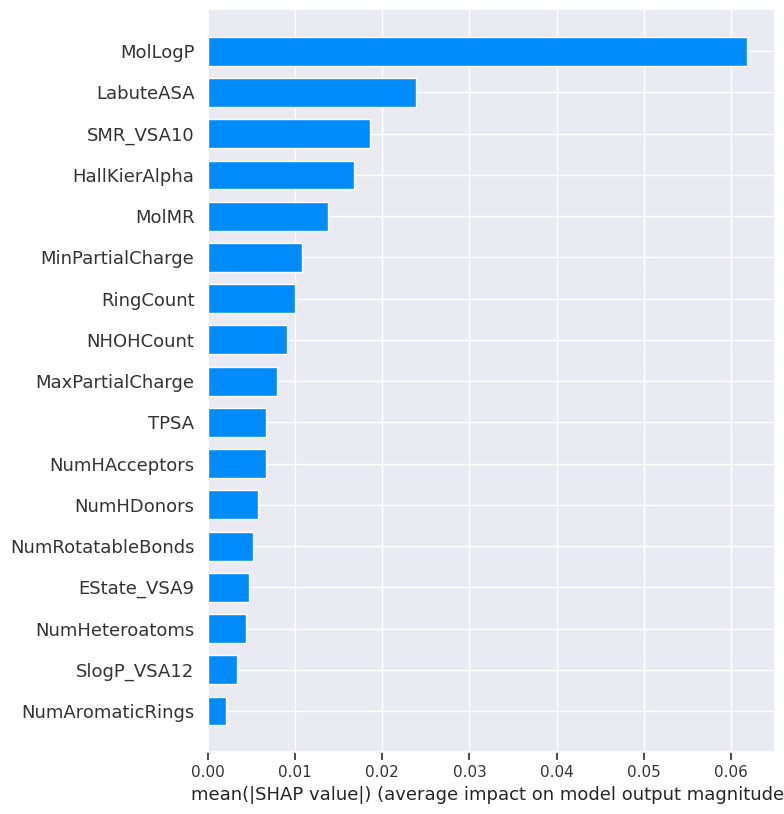

In [ ]:
import shap

explainer = shap.TreeExplainer(model_cat)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

# модель хгббуст #

In [ ]:
import xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
model_xgb = XGBRegressor()

xgb_grid_param = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(model_xgb,
                        xgb_grid_param,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[09:48:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [ ]:
r2_score(y_test, xgb_grid.predict(X_test))

0.7453753640950794

график важности фичей xgbRegressor

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


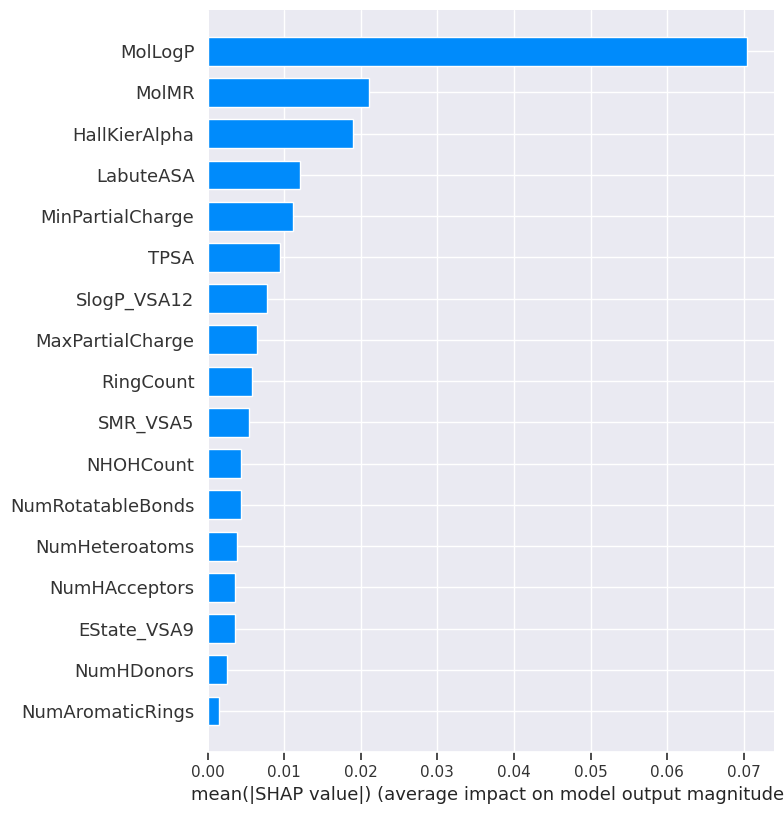

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

# модель лассо регрессия =(

In [ ]:
from sklearn.linear_model import Lasso

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
model_lasso = Lasso(random_state=666, max_iter=1000)
lasso_grid = GridSearchCV(model_lasso, params, cv=5)
lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(random_state=666),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [ ]:
r2_score(y_test, lasso_grid.predict(X_test))

0.5986378706723268

# нейронка

In [ ]:
!pip -q install tensorflow
!pip -q install sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import tensorflow as tf

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)])

model1.compile(optimizer='adam', loss='mean_squared_error')
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
r2_score(y_test, model1.predict(X_test))

70/70 [==============================] - 0s 2ms/step


0.6571009509198367